In [1]:
import matplotlib.pylab as plt 
import matplotlib.pyplot as plt; plt.rcdefaults()

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

%matplotlib inline

### We are going to fit the curve using "scipy.optimize.curve_fit"


$\dfrac{d[Ca^{2+}]_i}{dt}$ = $\dfrac{-V_{max}}{1+\dfrac{k_d}{[Ca^{2+}]_i}} + LeakRate\times([Ca^{2+}]_{i,max}-[Ca^{2+}]_i$

- $[Ca^{2+}]_i$ is the dependent variable 
- $V_{max}$: parameter, indicates the maximum extrusion rate of $[Ca^{2+}]_i$ via SERCA pump
- $k_d$: parameter, is the soft threshold for the pump activation. If $[Ca^{2+}]_i$ is below the threshold then the whole denominator larger than numerator so the term is small. On the other hand, if $[Ca^{2+}]_i$ is above the threshold, then the whole $\dfrac{k_d}{[Ca^{2+}]_i}$ is small enough to result the denominator as zero so the whole term becomes $V_{max}$
- LeakRate: parameter, determines how quick the $[Ca^{2+}]_i$ is being restored 
- $[Ca^{2+}]_{i,max}$: constant

#### Task: adjust the parameters to fit the curve
1. manually
2. via curve_fit

In [2]:
import numpy as np
import scipy
from scipy.optimize import curve_fit
from scipy.integrate import odeint

## This is the experiment data: "Reference"
adtime = [0.,0.05263158,0.07894737,0.10526316,0.13157895,0.15789474,0.18421053,0.26315789,0.36842105,0.5,0.73684211,0.84210526,0.86842105]
adconc = [0.62,0.58941176,0.52313725,0.40078431,0.33960784,0.31411765, 0.27843137, 0.22745098, 0.17137255, 0.13058824, 0.10509804, 0.1, 0.1]

### Manually fit the plot

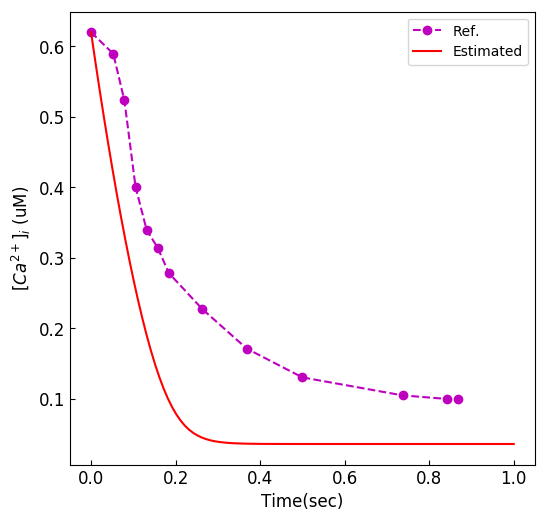

In [3]:
def func(Cai,t,Vmax,kd,leakRate):
    dCadt = -Vmax/(1+(kd/Cai)) + leakRate*(0.7-Cai)
    return dCadt

#### Tune this to get the best fit
Vmax_test = 5
kd_test = 0.1
leakRate_test = 2


####################################
Ca0 = adconc[0]
t = scipy.linspace(0,1,100)
####################################
Ca_estimated = odeint(func,Ca0,t,args=(Vmax_test,kd_test,leakRate_test,))

plt.figure(figsize=(6,6),dpi=100)
plt.tick_params(direction='in',labelsize=12)
plt.plot(adtime,adconc,'--om',label='Ref.')
plt.plot(t,Ca_estimated,'r-',label='Estimated')
plt.xlabel('Time(sec)',fontsize=12)
plt.ylabel('$[Ca^{2+}]_i$ (uM)',fontsize=12)
plt.legend(loc='best',fontsize=10)

### Fit the plot via scipy.optimize.curve_fit

[3.31831689 0.24337037 1.6200011 ]


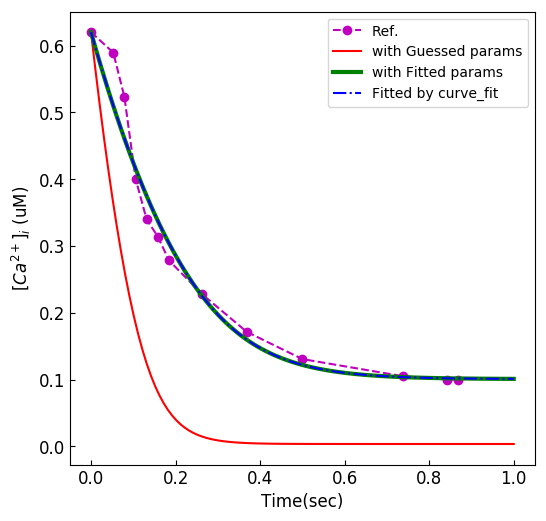

In [4]:
def fitfunc(t,Vmax, kd, leakRate):
    def myode(Cai, t):
        dCadt = -Vmax/(1+(kd/Cai)) + leakRate*(0.7-Cai)
        return dCadt
    
    Ca0 = adconc[0]
    Casol = odeint(myode,Ca0,t)
    return Casol[:,0]

guess = [10,0.5,0.1] ## Initial guess is important. If your guess is so wild, then fitting may fail.

kfit,kcov = curve_fit(fitfunc,adtime,adconc,guess)
print(kfit) ## This is the fitted parameters. This is being printed 

tfit = np.linspace(0,1)
fit = fitfunc(tfit,kfit[0],kfit[1],kfit[2])  ## applying newly fitted parameters 

#### parameters before and after fitting 
## Before
Vmax_test1 = guess[0]
kd_test1 = guess[1]
leakRate_test1 = guess[2]
## After 
Vmax_test2 = kfit[0]
kd_test2 = kfit[1]
leakRate_test2 = kfit[2]

####################################
Ca0 = adconc[0]
t = scipy.linspace(0,1,100)
####################################
Ca_estimated1 = odeint(func,Ca0,t,args=(Vmax_test1,kd_test1,leakRate_test1,)) ### You are testing your initial guess for parameters before fitting
Ca_estimated2 = odeint(func,Ca0,t,args=(Vmax_test2,kd_test2,leakRate_test2,)) ### You are testing parameters fitted by Curve_fit -> You are repeating data generation of "fit"

plt.figure(figsize=(6,6),dpi=100)
plt.tick_params(direction='in',labelsize=12)
plt.plot(adtime,adconc,'--om',label='Ref.')
plt.plot(t,Ca_estimated1,'r-',label='with Guessed params')
plt.plot(t,Ca_estimated2,'g-',lw=3,label='with Fitted params')
plt.plot(tfit, fit, 'b-.', label='Fitted by curve_fit')
plt.xlabel('Time(sec)',fontsize=12)
plt.ylabel('$[Ca^{2+}]_i$ (uM)',fontsize=12)
plt.legend(loc='best',fontsize=10)
